In [1]:
# Numpy y pandas 
import numpy as np
import pandas as pd

# Scikit-Learn para ajustar los modelos
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Para poder graficar en el notebook
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Parametros por defecto para los plots
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.titlesize'] = 16
matplotlib.rcParams['figure.figsize'] = [9, 7]

In [2]:

# Seteamos la semilla aleatoria
np.random.seed(42)

# "True" funcion que representa un proceso del mundo real
def true_gen(x):
    y = np.sin(1.2 * x * np.pi) 
    return(y)

# x e y value con un pequeño ruido aleatorio
x = np.sort(np.random.rand(120))

y = true_gen(x) + 0.1 * np.random.randn(len(x))

In [5]:
# Se generan indices aleatorios para crear conjuntos de entrenamiento y prueba
random_ind = np.random.choice(list(range(120)), size = 120, replace=False)
xt = x[random_ind]
yt = y[random_ind]

# Observaciones de entrenamiento y prueba
x_train = xt[:int(0.7 * len(x))]
x_test = xt[int(0.7 * len(x)):]

y_train = yt[:int(0.7 * len(y))]
y_test = yt[int(0.7 * len(y)):]

# Modelo de la 'funcion real'
x_linspace = np.linspace(0, 1, 1000)
y_true = true_gen(x_linspace)

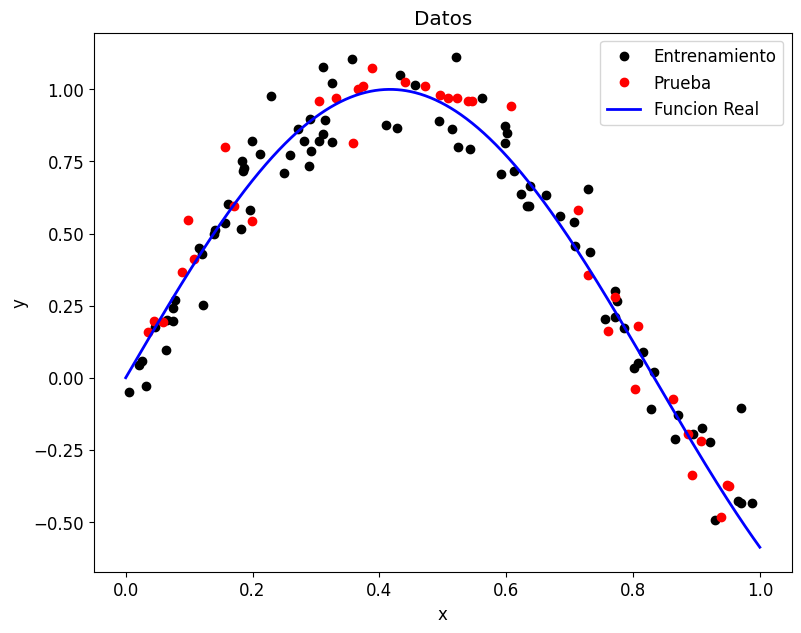

In [9]:
# Visualiza las observaciones y la 'funcion real'
plt.plot(x_train, y_train, 'ko', label = 'Entrenamiento'); 
plt.plot(x_test, y_test, 'ro', label = 'Prueba')
plt.plot(x_linspace, y_true, 'b-', linewidth = 2, label = 'Funcion Real')
plt.legend()
plt.xlabel('x'); plt.ylabel('y'); plt.title('Datos');

In [17]:
from sklearn.metrics import root_mean_squared_error


def fit_poly(x_train, y_train, x_test, y_test, degrees, plot='train', return_scores=False):
    
    features = PolynomialFeatures(degree=degrees, include_bias=False)
    
    x_train_trans = features.fit_transform(x_train.reshape((-1, 1)))
    
    model = LinearRegression()
    model.fit(x_train_trans, y_train)
    
    # Calcula el score de la validacion cruzada
    cross_valid = cross_val_score(model, x_train_trans, y_train, scoring='neg_mean_squared_error', cv = 5)
    
    # Predicciones de entrenamiento y error
    y_train_pred = model.predict(x_train_trans)
    training_error = root_mean_squared_error(y_train, y_train_pred)


    # Formatea variables de prueba
    x_test_trans = features.fit_transform(x_test.reshape((-1, 1)))
    
    # Prueba conjunto de predicciones y error
    y_test_pred = model.predict(x_test_trans)
    testing_error = root_mean_squared_error(y_test, y_test_pred)
    
    # Encuentra la curva real y la curva del modelo
    x_curve = np.linspace(0, 1, 100)
    # x_curve = x_curve.reshape((-1, 1))
    x_curve_trans = features.fit_transform(x_curve.reshape((-1, 1)))
    
    # Curva del Modelo
    model_curve = model.predict(x_curve_trans)
    
    # Curva Real
    y_true_curve = true_gen(x_curve)
    
    # Plotea las observaciones, 'funcion real', y funcion del modelo predictivo
    if plot == 'train':
        plt.plot(x_train.reshape((-1, 1))[:, 0], y_train, 'ko', label = 'Observaciones')
        plt.plot(x_curve.reshape((-1, 1))[:, 0], y_true_curve, linewidth = 4, label = 'Funcion Real')
        plt.plot(x_curve.reshape((-1, 1))[:, 0], model_curve, linewidth = 4, label = 'Funcion Modelo')
        plt.xlabel('x'); plt.ylabel('y')
        plt.legend()
        plt.ylim(-1, 1.5); plt.xlim(0, 1)
        plt.title('{} Grado del Modelo en la Data de Entrenamiento'.format(degrees))
        plt.show()
    
    elif plot == 'test':
        # Plotea las observaciones de prueba y predicciones de prueba
        plt.plot(x_test.reshape((-1, 1)), y_test, 'o', label = 'Observaciones de Prueba')
        plt.plot(x_curve.reshape((-1, 1))[:, 0], y_true_curve, 'b-', linewidth = 2, label = 'Funcion Real')
        plt.plot(x_test.reshape((-1, 1)), y_test_pred, 'ro', label = 'Predicciones de Prueba')
        plt.ylim(-1, 1.5); plt.xlim(0, 1)
        plt.legend(), plt.xlabel('x'), plt.ylabel('y'); plt.title('{} Grado del Modelo en la Data de Prueba'.format(degrees)), plt.show();
    
    # Retorna la metrica
    if return_scores:
        return training_error, testing_error, -np.mean(cross_valid)

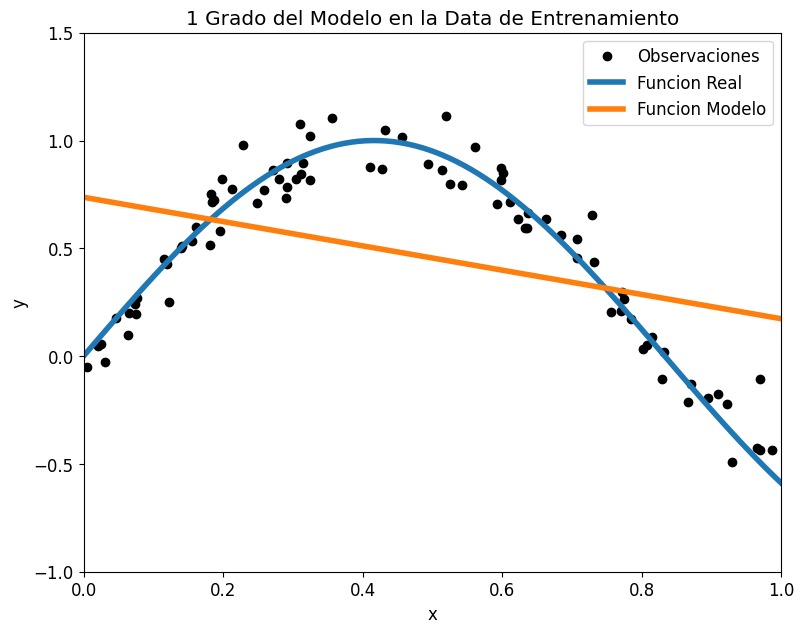

In [18]:
fit_poly(x_train, y_train, x_test, y_test, degrees = 1, plot='train')

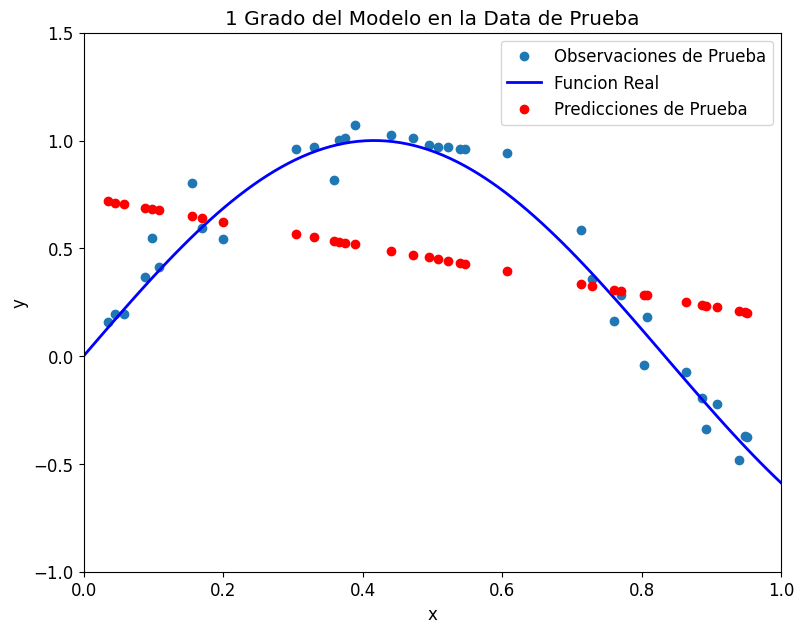

In [19]:
fit_poly(x_train, y_train, x_test, y_test, degrees = 1, plot='test')

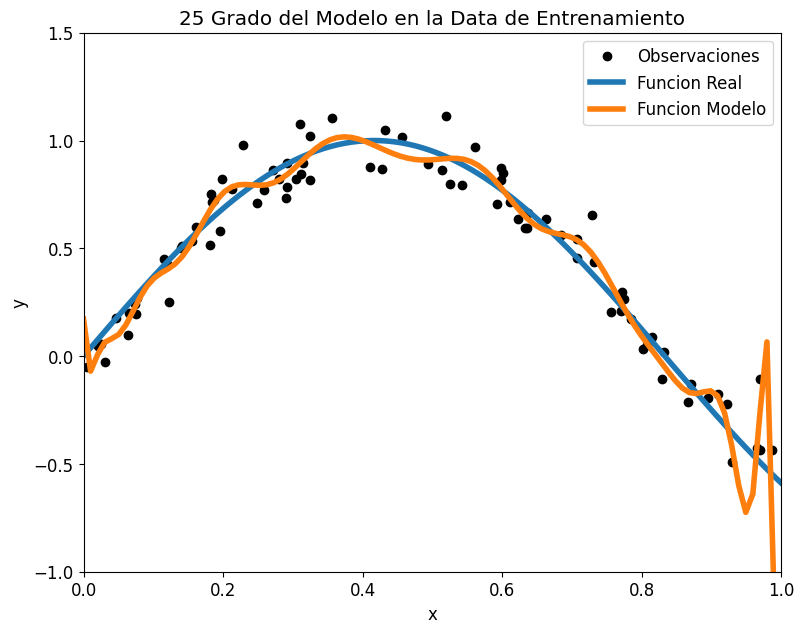

In [20]:
fit_poly(x_train, y_train, x_test, y_test, plot='train', degrees = 25)

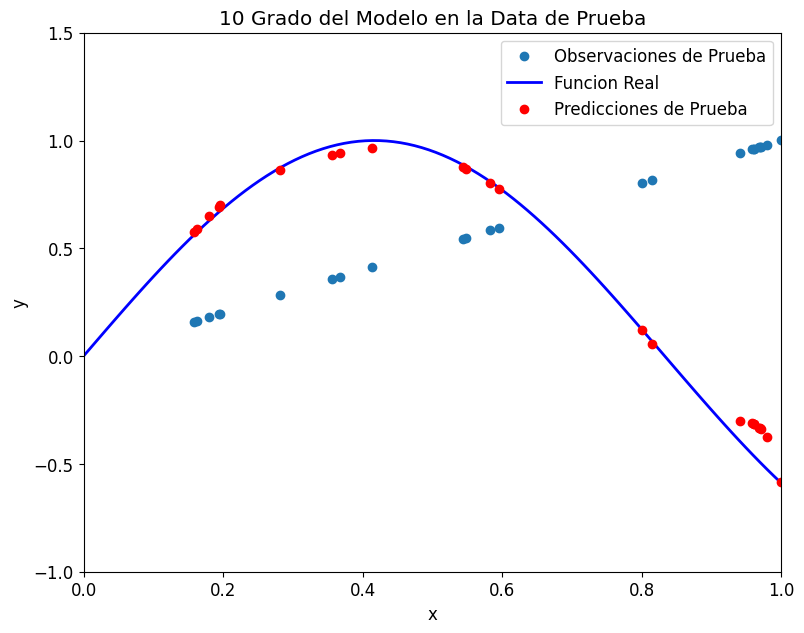

In [27]:
fit_poly(x_train, y_train, y_test, y_test, degrees=10, plot='test')

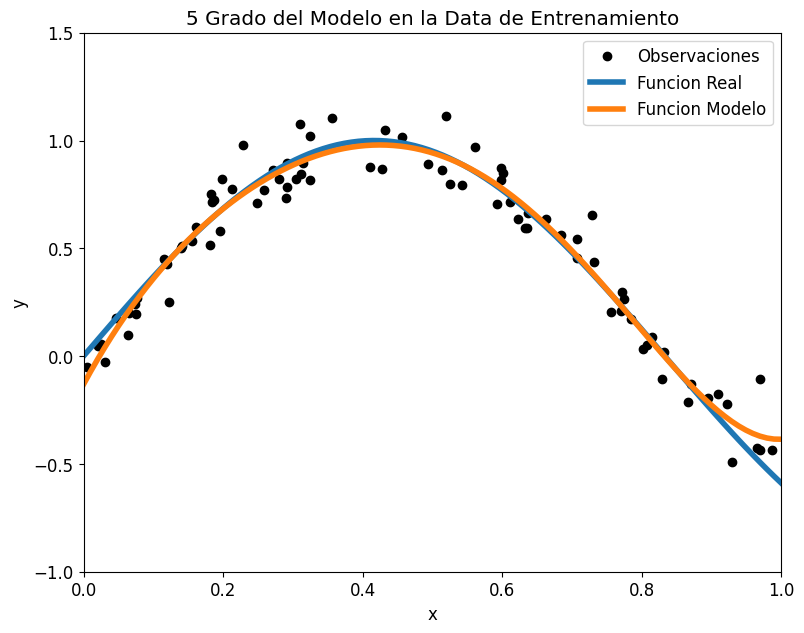

In [28]:
fit_poly(x_train, y_train, x_test, y_test, plot='train', degrees = 5)

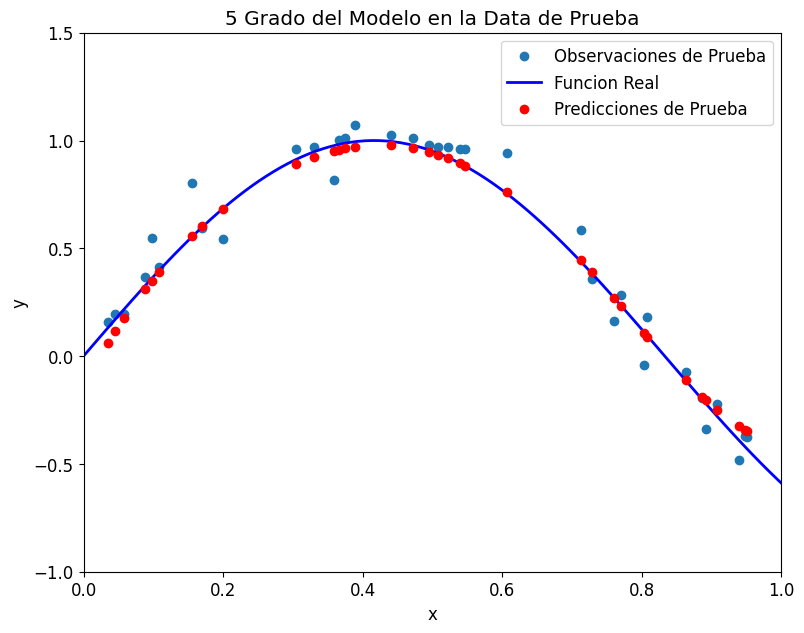

In [29]:
fit_poly(x_train, y_train, x_test, y_test, degrees=5, plot='test')

In [30]:
# Range of model degrees to evaluate
degrees = [int(x) for x in np.linspace(1, 40, 40)]

# Dataframe con los resultados
results = pd.DataFrame(0, columns = ['train_error', 'test_error', 'cross_valid'], index = degrees)

# Probar todos los grados para el modelo y grabar los resultados
for degree in degrees:
    degree_results = fit_poly(x_train, y_train, x_test, y_test, degree, plot=False, return_scores=True)
    results.loc[degree, 'train_error'] = degree_results[0]
    results.loc[degree, 'test_error'] = degree_results[1]
    results.loc[degree, 'cross_valid'] = degree_results[2]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9124\495745306.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3823366299526582' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.loc[degree, 'train_error'] = degree_results[0]
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9124\495745306.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.42986147822745946' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  results.loc[degree, 'test_error'] = degree_results[1]
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9124\495745306.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.153986423431434' has dtype incompatible with int64, please explicitly cast to a

In [37]:
print('10 Mas bajos errores de Validacion Cruzada\n')
train_eval = results.sort_values('cross_valid').reset_index(level=0).rename(columns={'index': 'degrees'})
train_eval.loc[:,['degrees', 'cross_valid']] .head(10)

10 Mas bajos errores de Validacion Cruzada



,degrees,cross_valid
0,4,0.010549
1,5,0.010637
2,7,0.010665
3,6,0.010887
4,8,0.011182
5,3,0.011695
6,9,0.011757
7,11,0.011769
8,10,0.011902
9,12,0.012642


El minimo error de validacion cruzada ocurre en 3 grados.



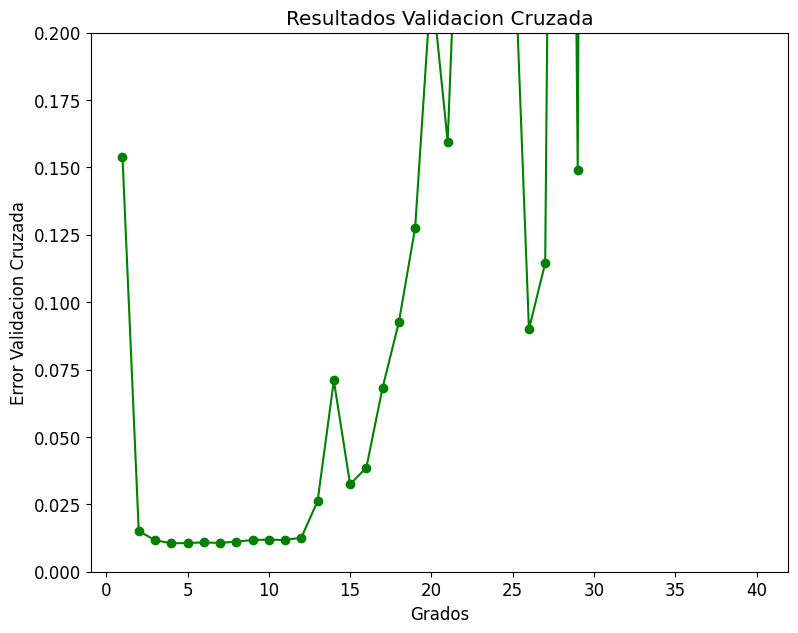

In [38]:
plt.plot(results.index, results['cross_valid'], 'go-', ms=6)
plt.xlabel('Grados'); plt.ylabel('Error Validacion Cruzada'); plt.title('Resultados Validacion Cruzada');
plt.ylim(0, 0.2)

print('El minimo error de validacion cruzada ocurre en {} grados.\n'.format(int(np.argmin(results['cross_valid']))))

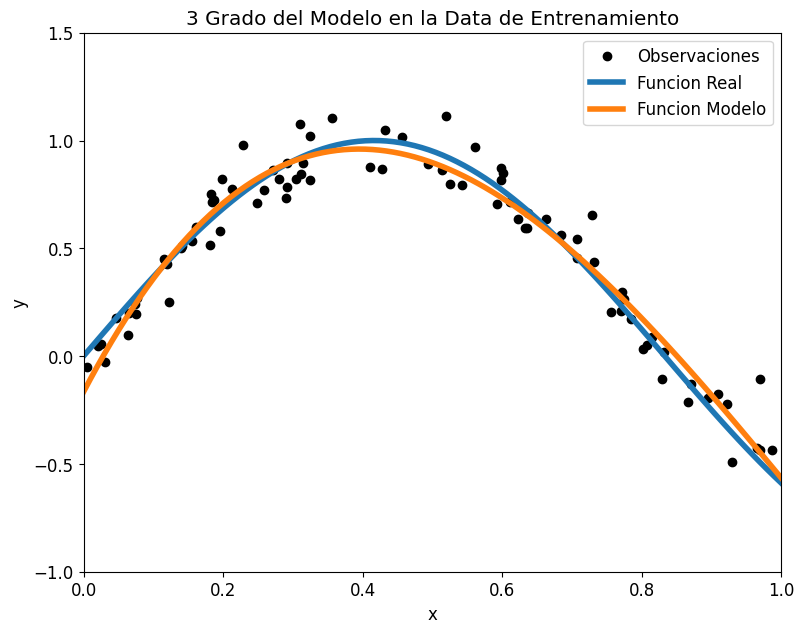

In [40]:
fit_poly(x_train, y_train, x_test, y_test, degrees=3, plot='train')

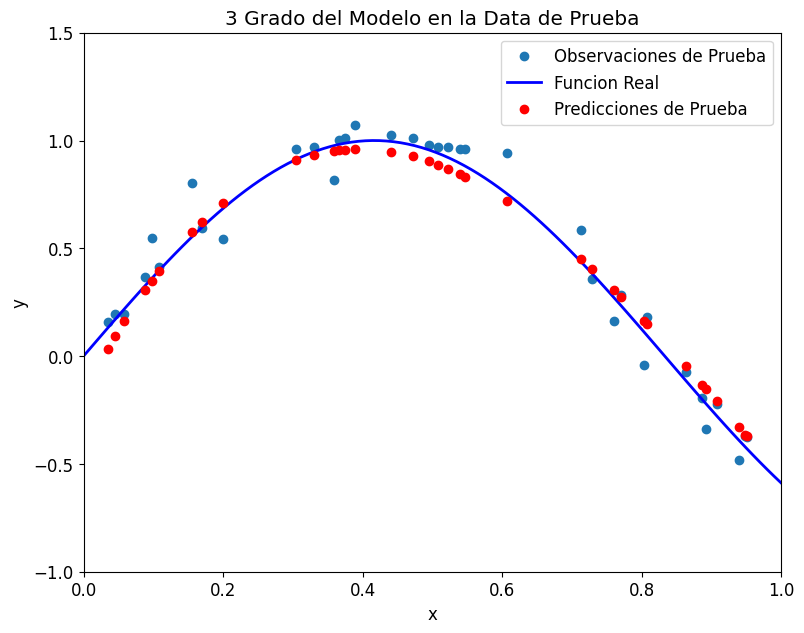

In [41]:
fit_poly(x_train, y_train, x_test, y_test, degrees=3, plot='test')

In [42]:
print('10 Mas Bajos Errores de Entrenamiento\n')
train_eval = results.sort_values('train_error').reset_index(level=0).rename(columns={'index': 'degrees'})
train_eval.loc[:,['degrees', 'train_error']] .head(10)

10 Mas Bajos Errores de Entrenamiento



,degrees,train_error
0,36,0.078410
1,35,0.078556
2,40,0.078798
3,39,0.079161
4,31,0.079812
5,32,0.080050
6,27,0.080202
7,28,0.080223
8,33,0.080257
9,34,0.080393


In [43]:
print('10 Mas Bajos Errores de Prueba\n')
train_eval = results.sort_values('test_error').reset_index(level=0).rename(columns={'index': 'degrees'})
train_eval.loc[:,['degrees', 'test_error']] .head(10)

10 Mas Bajos Errores de Prueba



,degrees,test_error
0,5,0.097375
1,6,0.101069
2,4,0.102387
3,8,0.103001
4,7,0.103043
5,9,0.103702
6,14,0.105908
7,10,0.106398
8,11,0.106498
9,13,0.106708


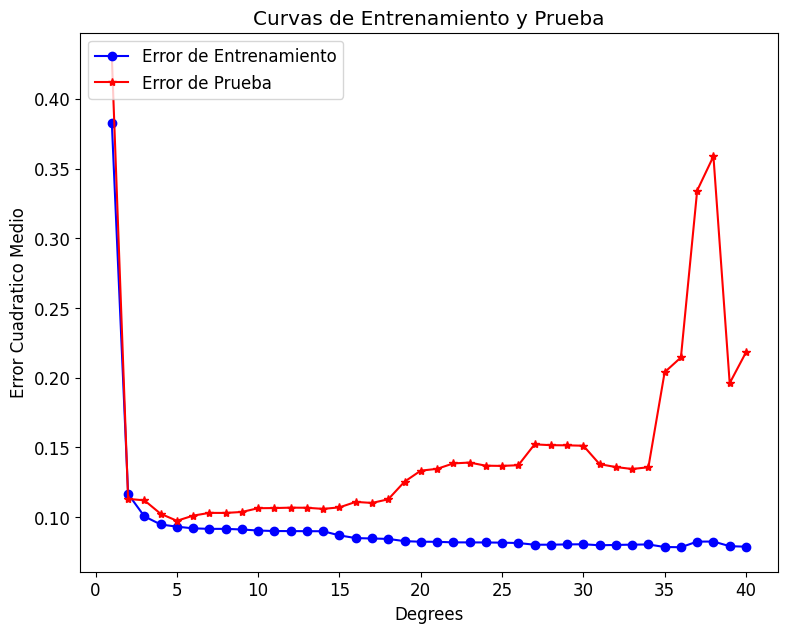


Minimo Error de Entrenamiento ocurre a 35 grados.
Minimo Error de Prueba ocurre a 4 grados.



In [47]:
plt.plot(results.index, results['train_error'], 'b-o', ms=6, label = 'Error de Entrenamiento')
plt.plot(results.index, results['test_error'], 'r-*', ms=6, label = 'Error de Prueba')
plt.legend(loc=2); plt.xlabel('Degrees'); plt.ylabel('Error Cuadratico Medio'); plt.title('Curvas de Entrenamiento y Prueba');
plt.show()

print('\nMinimo Error de Entrenamiento ocurre a {} grados.'.format(int(np.argmin(results['train_error']))))
print('Minimo Error de Prueba ocurre a {} grados.\n'.format(int(np.argmin(results['test_error']))))